In [ ]:
# PRE-PROCESSAMENTO DE DADOS


<h2>Diagnóstico de Câncer de Mama em Wisconsin (WDBC)<h2> 

- campo preditivo 2, diagnóstico: B = benigno, M = maligno
- os conjuntos são linearmente separáveis usando todos os 30 recursos de entrada
- melhor precisão preditiva obtida usando um plano de separação
no espaço 3-D de Pior Área, Pior Suavidade e
Textura média. Precisão estimada de 97,5% usando repetições
Validações cruzadas de 10 vezes. O classificador foi corretamente
diagnosticou 176 novos pacientes consecutivos em novembro
1995.

Dez características de valor real são calculadas para cada núcleo celular:

- a) raio (média das distâncias do centro aos pontos do perímetro)
- b) textura (desvio padrão dos valores da escala de cinza)
- c) perímetro
- d) área
- e) suavidade (variação local nos comprimentos dos raios)
- f) compacidade (perímetro ^ 2 / área - 1,0)
- g) concavidade (gravidade das porções côncavas do contorno)
- h) pontos côncavos (número de porções côncavas do contorno)
- i) simetria
- j) dimensão fractal ("aproximação da linha costeira" - 1)

In [29]:
def substituir_strings_por_numeros(linha, mapeamento):
    """
    Substitui as strings por números em uma
    linha de acordo com o mapeamento fornecido.
    """
    for chave, valor in mapeamento.items():
        linha = linha.replace(chave, valor)
    return linha

def converter_arquivo(arquivo_entrada, arquivo_saida, mapeamento):
    """
    Converte o arquivo de entrada substituindo as 
    strings por números de acordo com o mapeamento fornecido.
    """
    with open(arquivo_entrada, 'r') as arquivo_entrada, open(arquivo_saida, 'w') as arquivo_saida:
        for linha in arquivo_entrada:
            linha_numerica = substituir_strings_por_numeros(linha, mapeamento)
            arquivo_saida.write(linha_numerica)

#conversão
mapeamento_linha = {
    'M': '1',
    'B': '0'
}
arquivo_entrada = 'wdbc.data'
arquivo_saida = 'wdbc_pre'

converter_arquivo(arquivo_entrada, arquivo_saida, mapeamento_linha)


In [30]:
def remove_ids(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        for line in infile:
            # Split ID
            parts = line.split(',', 1)
            if len(parts) > 1:
                outfile.write(parts[1])

input_file = 'wdbc_pre'
output_file = 'wdbc_normalizacao'

remove_ids(input_file, output_file)


{'0': 357, '1': 212}


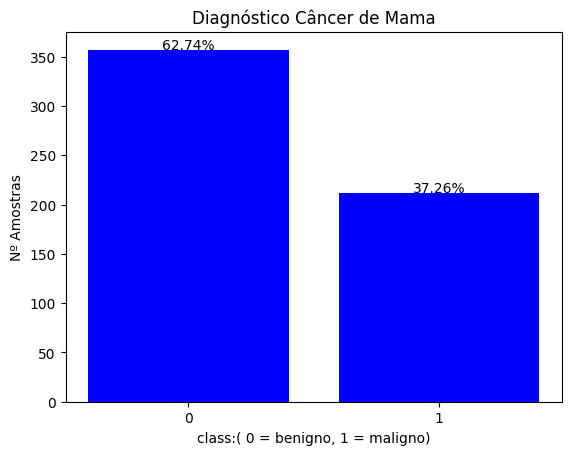

In [32]:
import matplotlib.pyplot as plt

def plotar_grafico_contagem(arquivo):
    class_distribution_tumor = {'0': 0, '1': 0}
    
    total_linhas = 0
    with open(arquivo, 'r') as file:
        for linha in file:
            # Pegando a classe
            classes = linha.strip()[0]
            if classes in class_distribution_tumor:
                class_distribution_tumor[classes] += 1
                total_linhas += 1

    porcentagens = {k: (v / total_linhas) * 100 for k, v in class_distribution_tumor.items()}
   
    plt.bar(class_distribution_tumor.keys(), class_distribution_tumor.values(), color='blue')

    plt.xlabel('class:( 0 = benigno, 1 = maligno)')
    plt.ylabel('Nº Amostras')
    plt.title('Diagnóstico Câncer de Mama')
    print(class_distribution_tumor)
    # Exibindo as porcentagens
    for key, value in class_distribution_tumor.items():
        plt.text(key, value + 0.5, f'{porcentagens[key]:.2f}%', ha='center')
    plt.show()

plotar_grafico_contagem('wdbc_normalizacao')

In [36]:
# Convertendo para CSV
df = pd.read_csv('wdbc_normalizacao', header=None)
df.to_csv('wdbc_normalizacao.csv', index=False)
